In [1]:
import json
import pandas

json_data = json.load(open("data/mmum.json"))
hops = pandas.json_normalize(json_data, "hops", ["style", "name"], record_prefix="hop_")

In [13]:
# Pick a style
# Hops are aggregated for each recipe
style_hops = hops[hops["style"] == "Pale Ale"].groupby(["name", "hop_kind"]).agg({"hop_amount": "sum", "hop_amount_percent": "sum"}).reset_index()
style_hops["hop_kind"].value_counts()[:10]

hop_ratio = style_hops.groupby("hop_kind")['hop_amount_percent'].agg(['min', 'max', 'mean', 'count'])
hop_ratio = hop_ratio[hop_ratio['count'] > 3] # Filter low amount of data points
hop_ratio.sort_values(by='count', ascending=0).head(20)

,min,max,mean,count
hop_kind,,,,
cascade,4.816514,100.000000,56.155012,34
citra,4.816514,100.000000,61.372042,25
amarillo,20.414201,100.000000,48.549107,16
magnum,6.557377,38.095238,20.641866,15
simcoe,11.111111,100.000000,43.424715,15
chinook,20.338983,100.000000,51.462375,10
centennial,16.666667,100.000000,38.722228,9
perle,9.973753,100.000000,34.265253,9
hüll melon,25.000000,100.000000,61.249965,8


In [4]:
top_hops = style_hops["hop_kind"].value_counts()[:20].index.values
style_top_hops = style_hops[style_hops['hop_kind'].isin(top_hops)] # Get only the values of the mostly used hops
# style_top_hops.loc[:, ["hop_kind", "hop_amount_percent"]]

<AxesSubplot:xlabel='hop_kind', ylabel='hop_amount_percent'>

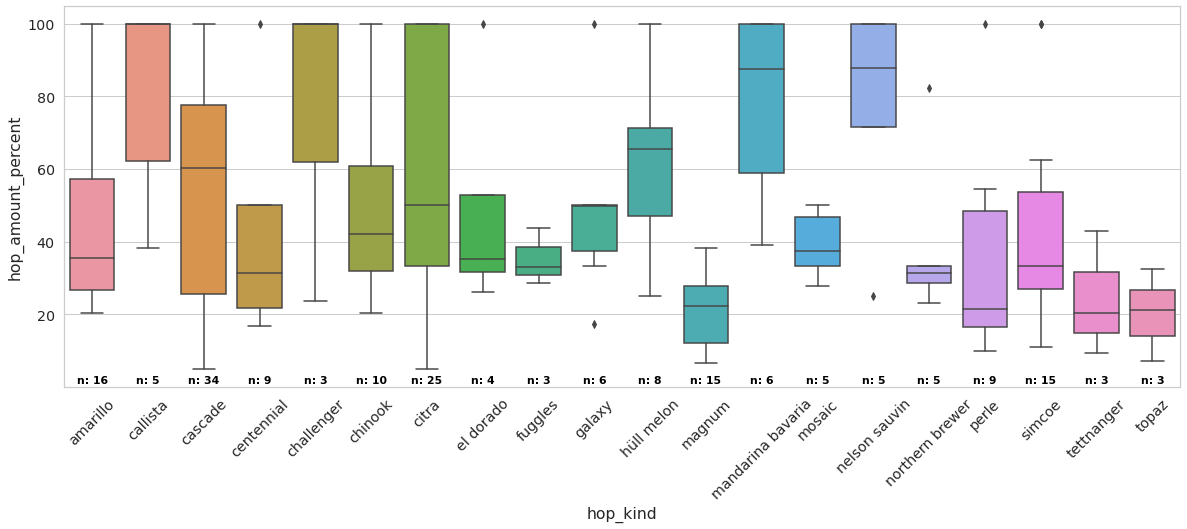

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
sns.set(style="whitegrid", font_scale=1.3)

style_top_hops = style_top_hops.sort_values(["hop_kind"]).reset_index(drop=True)

# Calculate number of obs per group
nobs = style_top_hops.groupby("hop_kind")["hop_kind"].agg(["count"]).sort_values(["hop_kind"]).reset_index(drop=True)['count'].values
nobs = [str(x) for x in nobs]
nobs = ["n: " + i for i in nobs]

plot = sns.boxplot(x=style_top_hops["hop_kind"], y=style_top_hops["hop_amount_percent"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

pos = range(len(nobs))
for tick, label in zip(pos, plot.get_xticklabels()):
    plot.text(pos[tick], 1, nobs[tick],
        horizontalalignment='center', size='x-small', color='black', weight='semibold')

plot